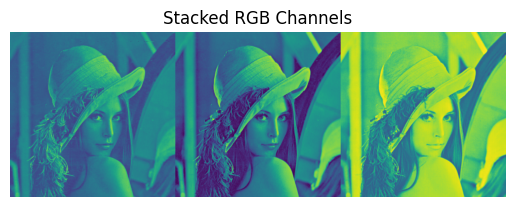

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Task 1: Read the provided image “Lena Image”
lena_image = cv2.imread('/content/Lena_Image.png')  # Change the path if needed

# Extract RGB channels and stack them together
b, g, r = cv2.split(lena_image)
stacked_rgb = np.hstack((b, g, r))
plt.imshow(stacked_rgb)
plt.title("Stacked RGB Channels")
plt.axis("off")
plt.show()

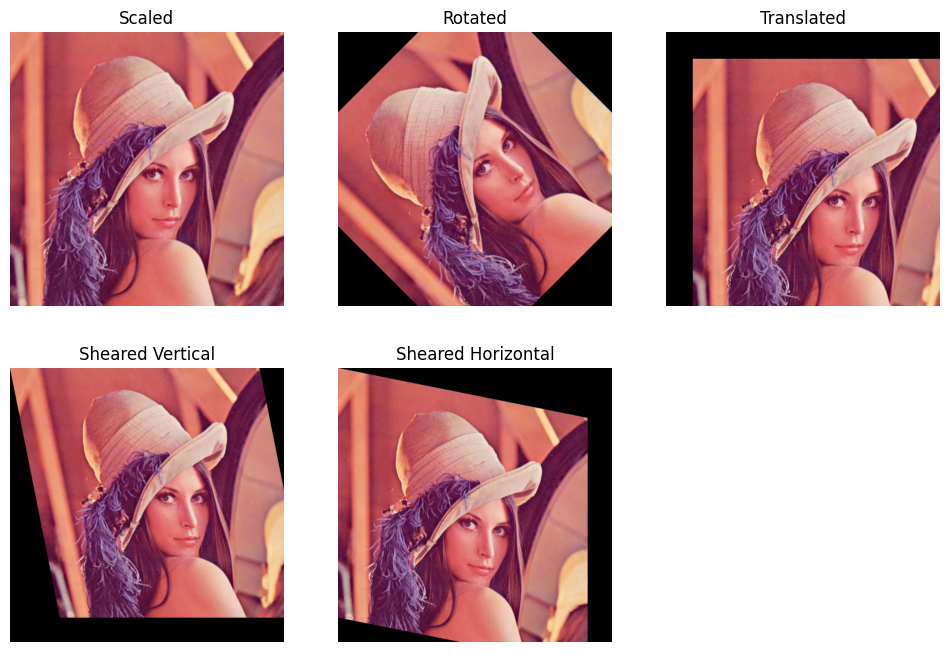

In [ ]:
# Task 2: Perform Image Transformations
rows, cols = lena_image.shape[:2]

# Scaling
scaled = cv2.resize(lena_image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# Rotation
M_rot = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated = cv2.warpAffine(lena_image, M_rot, (cols, rows))

# Translation
M_trans = np.float32([[1, 0, 50], [0, 1, 50]])
translated = cv2.warpAffine(lena_image, M_trans, (cols, rows))

# Shearing (Vertical & Horizontal)
M_shear_v = np.float32([[1, 0.2, 0], [0, 1, 0]])
M_shear_h = np.float32([[1, 0, 0], [0.2, 1, 0]])
sheared_v = cv2.warpAffine(lena_image, M_shear_v, (cols + 50, rows + 50))
sheared_h = cv2.warpAffine(lena_image, M_shear_h, (cols + 50, rows + 50))

# Display transformations
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].imshow(cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Scaled")
axs[0, 1].imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("Rotated")
axs[0, 2].imshow(cv2.cvtColor(translated, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title("Translated")
axs[1, 0].imshow(cv2.cvtColor(sheared_v, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Sheared Vertical")
axs[1, 1].imshow(cv2.cvtColor(sheared_h, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Sheared Horizontal")
for ax in axs.flat:
    ax.axis("off")
plt.show()

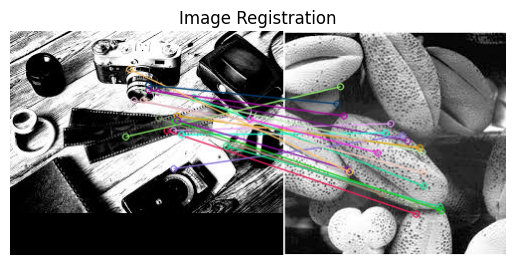

In [ ]:

# Task 3
image1 = cv2.imread('/content/Image_Intensity_Transformation_1.jpeg', 0)
image2 = cv2.imread('/content/Image_Intensity_Transformation_2.jpeg', 0)
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(image1, None)
kp2, des2 = orb.detectAndCompute(image2, None)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
registered_image = cv2.drawMatches(image1, kp1, image2, kp2, matches[:20], None, flags=2)
plt.imshow(registered_image, cmap='gray')
plt.title("Image Registration")
plt.axis("off")
plt.show()

<ipython-input-7-61c5eae0f154>:8: RuntimeWarning: divide by zero encountered in log
  log_transformed = np.uint8(45 * np.log(1 + gray_image))
<ipython-input-7-61c5eae0f154>:8: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.uint8(45 * np.log(1 + gray_image))


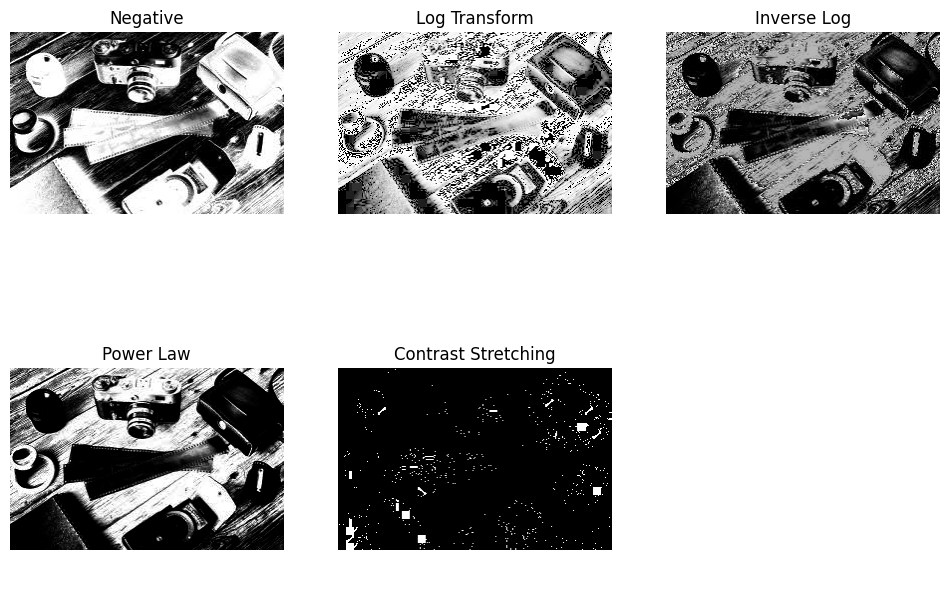

In [ ]:
# Task 4: Intensity Transformations on Grayscale Image
gray_image = cv2.imread('/content/Image_Intensity_Transformation_1.jpeg', 0)

# a. Negative Transformation
negative = 255 - gray_image

# b. Logarithmic Transformation
log_transformed = np.uint8(45 * np.log(1 + gray_image))

# c. Inverse Log Transformation
inverse_log_transformed = np.uint8(255 * (np.exp(gray_image / 255) - 1))

# d. Power Law Transformation
gamma_corrected = np.uint8(255 * ((gray_image / 255) ** 2.2))

# e. Contrast Stretching
min_intensity = np.min(gray_image)
max_intensity = np.max(gray_image)
stretched = np.uint8(255 * (gray_image - min_intensity) / (max_intensity - min_intensity))

# Display transformations
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].imshow(negative, cmap='gray')
axs[0, 0].set_title("Negative")
axs[0, 1].imshow(log_transformed, cmap='gray')
axs[0, 1].set_title("Log Transform")
axs[0, 2].imshow(inverse_log_transformed, cmap='gray')
axs[0, 2].set_title("Inverse Log")
axs[1, 0].imshow(gamma_corrected, cmap='gray')
axs[1, 0].set_title("Power Law")
axs[1, 1].imshow(stretched, cmap='gray')
axs[1, 1].set_title("Contrast Stretching")
for ax in axs.flat:
    ax.axis("off")
plt.show()

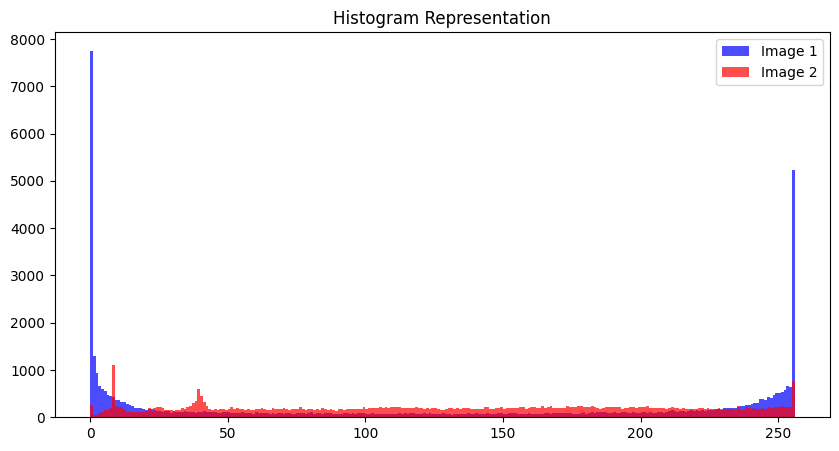

In [ ]:
# Task 5: Histogram Representation
image2_gray = cv2.imread('/content/Image_Intensity_Transformation_2.jpeg', 0)
plt.figure(figsize=(10, 5))
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7, label='Image 1')
plt.hist(image2_gray.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7, label='Image 2')
plt.legend()
plt.title("Histogram Representation")
plt.show()
